___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

the deleted features (rownumber,surname, Customer_ID)
geography the feature that will not be trained

# Improt Libraries & Data

In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [4]:
!pip3 install tensorflow

In [5]:
# Get tensorflow version
import tensorflow as tf

In [6]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

GPU support is enabled for this session.


In [7]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Mon Oct 30 12:35:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
#df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

Implement basic steps to see how is your data looks like

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.shape

(10000, 14)

In [12]:
df.duplicated().sum()

0

In [13]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


In [14]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.600,1,1,0,53667.080,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.210,1,1,0,69384.710,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.000,1,1,0,195192.400,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.410,1,1,0,29179.520,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [15]:
# No outliers only feature (Age) has a little bit outliers as pressented in the below pic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


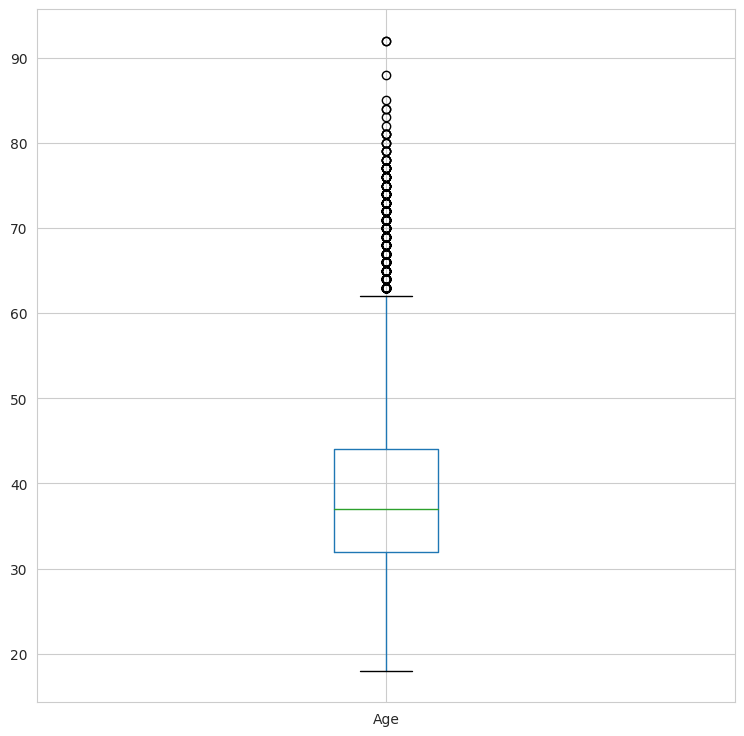

In [16]:
# Age feature contains some outliers
plt.figure(figsize=(9,9))
df.boxplot(['Age'])
plt.show()

In [17]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Check for missing values

In [18]:
df.isnull().sum() #no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
#how many pepole salary is zero and isactivemember is 0
df[(df['Balance']==0) & (df['IsActiveMember']==0)].count()

RowNumber          1744
CustomerId         1744
Surname            1744
CreditScore        1744
Geography          1744
Gender             1744
Age                1744
Tenure             1744
Balance            1744
NumOfProducts      1744
HasCrCard          1744
IsActiveMember     1744
EstimatedSalary    1744
Exited             1744
dtype: int64

In [20]:
df[(df['Balance']>0) & (df['IsActiveMember']==0)].count()

RowNumber          3105
CustomerId         3105
Surname            3105
CreditScore        3105
Geography          3105
Gender             3105
Age                3105
Tenure             3105
Balance            3105
NumOfProducts      3105
HasCrCard          3105
IsActiveMember     3105
EstimatedSalary    3105
Exited             3105
dtype: int64

In [21]:
df[(df['Balance']>0) & (df['IsActiveMember']==1)].count()

RowNumber          3278
CustomerId         3278
Surname            3278
CreditScore        3278
Geography          3278
Gender             3278
Age                3278
Tenure             3278
Balance            3278
NumOfProducts      3278
HasCrCard          3278
IsActiveMember     3278
EstimatedSalary    3278
Exited             3278
dtype: int64

In [22]:
df[(df['Balance']>0) & (df['Exited']==1)].count()

RowNumber          1537
CustomerId         1537
Surname            1537
CreditScore        1537
Geography          1537
Gender             1537
Age                1537
Tenure             1537
Balance            1537
NumOfProducts      1537
HasCrCard          1537
IsActiveMember     1537
EstimatedSalary    1537
Exited             1537
dtype: int64

In [23]:
df[(df['Balance']==0) & (df['Exited']==1)].count()

RowNumber          500
CustomerId         500
Surname            500
CreditScore        500
Geography          500
Gender             500
Age                500
Tenure             500
Balance            500
NumOfProducts      500
HasCrCard          500
IsActiveMember     500
EstimatedSalary    500
Exited             500
dtype: int64

In [24]:
function_dictionary = {'CustomerId':'count','Balance':'mean'}
df.groupby("Exited").aggregate(function_dictionary)

,CustomerId,Balance
Exited,,
0,7963,72745.297
1,2037,91108.539


Implement basic visualization steps such as histogram, countplot, heatmap

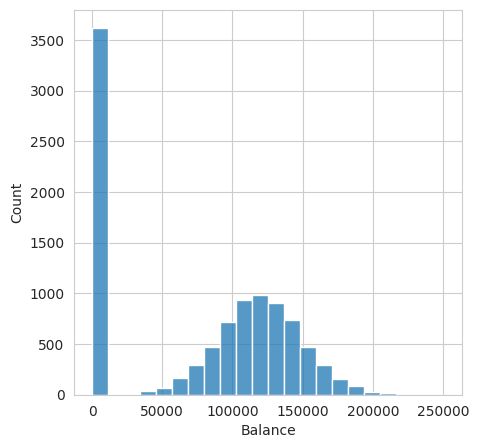

In [25]:
# people with 0 balance are much more than the rest, but we cant consider them as outliers
plt.figure(figsize=(5,5))
sns.histplot(x=df["Balance"])
plt.show()


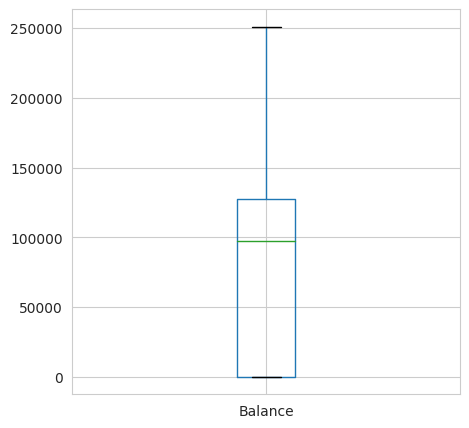

In [26]:
# we could notice that the boxplot of 'Balance' doesnt show any outlier
plt.figure(figsize=(5,5))
df.boxplot(['Balance'])
plt.show()

In [27]:
# The classes are imbalanced
df.Exited.value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

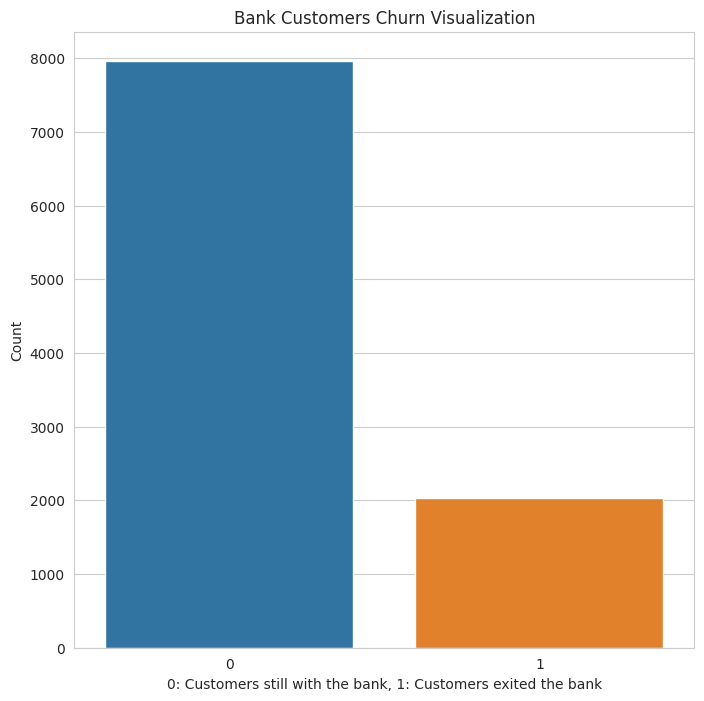

In [28]:
# Visualizing the classes which are imbalanced
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

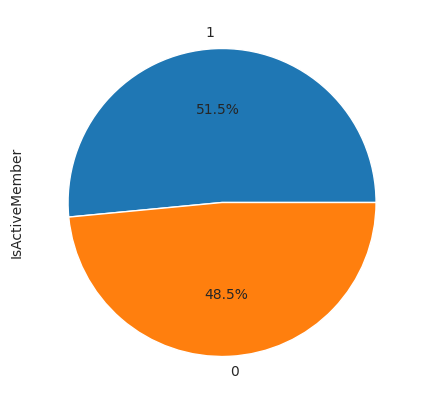

In [29]:
# We have a fair amount of each Active and NotActive
df["IsActiveMember"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(5,5));

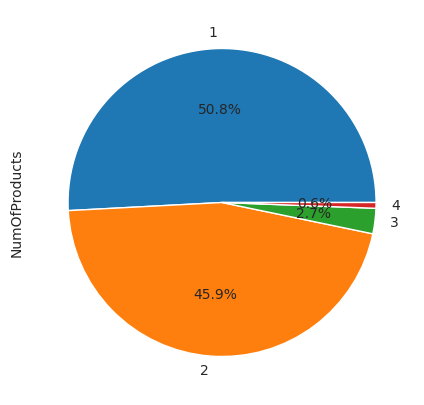

In [30]:
# People with 1 and 2 products take the majority
df["NumOfProducts"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(5,5));

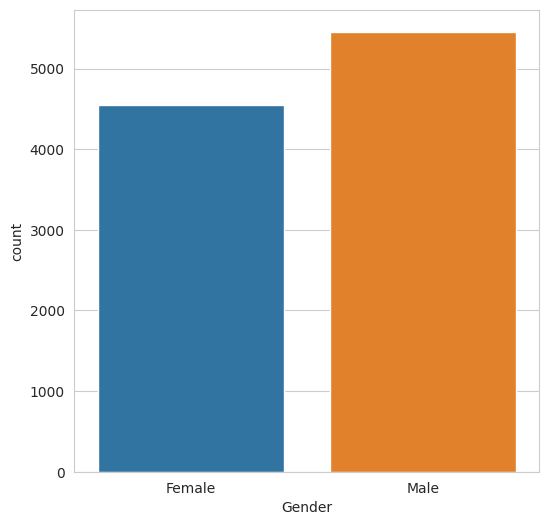

In [31]:
# Males are slitghtly more than females
plt.figure(figsize=(6,6))
sns.countplot(x=df["Gender"])
plt.show()

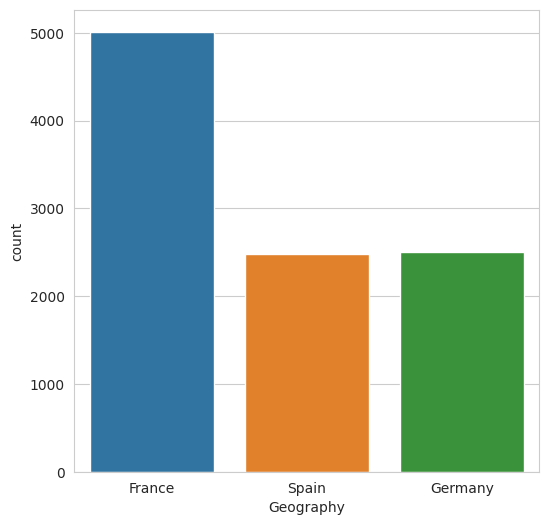

In [32]:
# France takes the majority
plt.figure(figsize=(6,6))
sns.countplot(x=df["Geography"])
plt.show()

In [33]:
# compare with the number of people in each country, a lot of germany people close their account
grouped = df.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [34]:
# Most of people in our sample in their 30`s
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

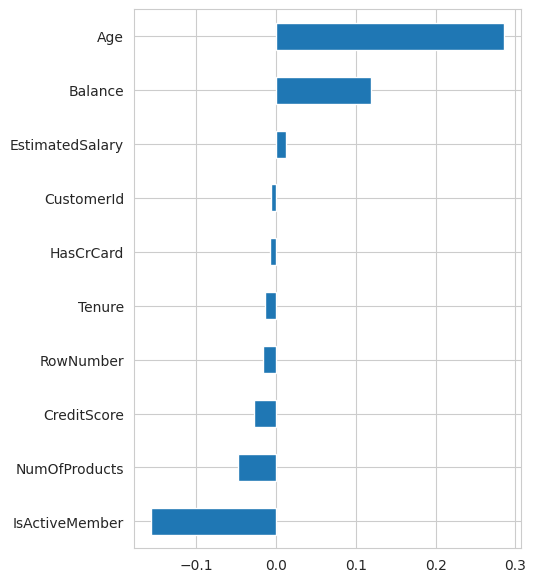

In [35]:
# There are no high corrleation
plt.figure(figsize=(5,7))
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

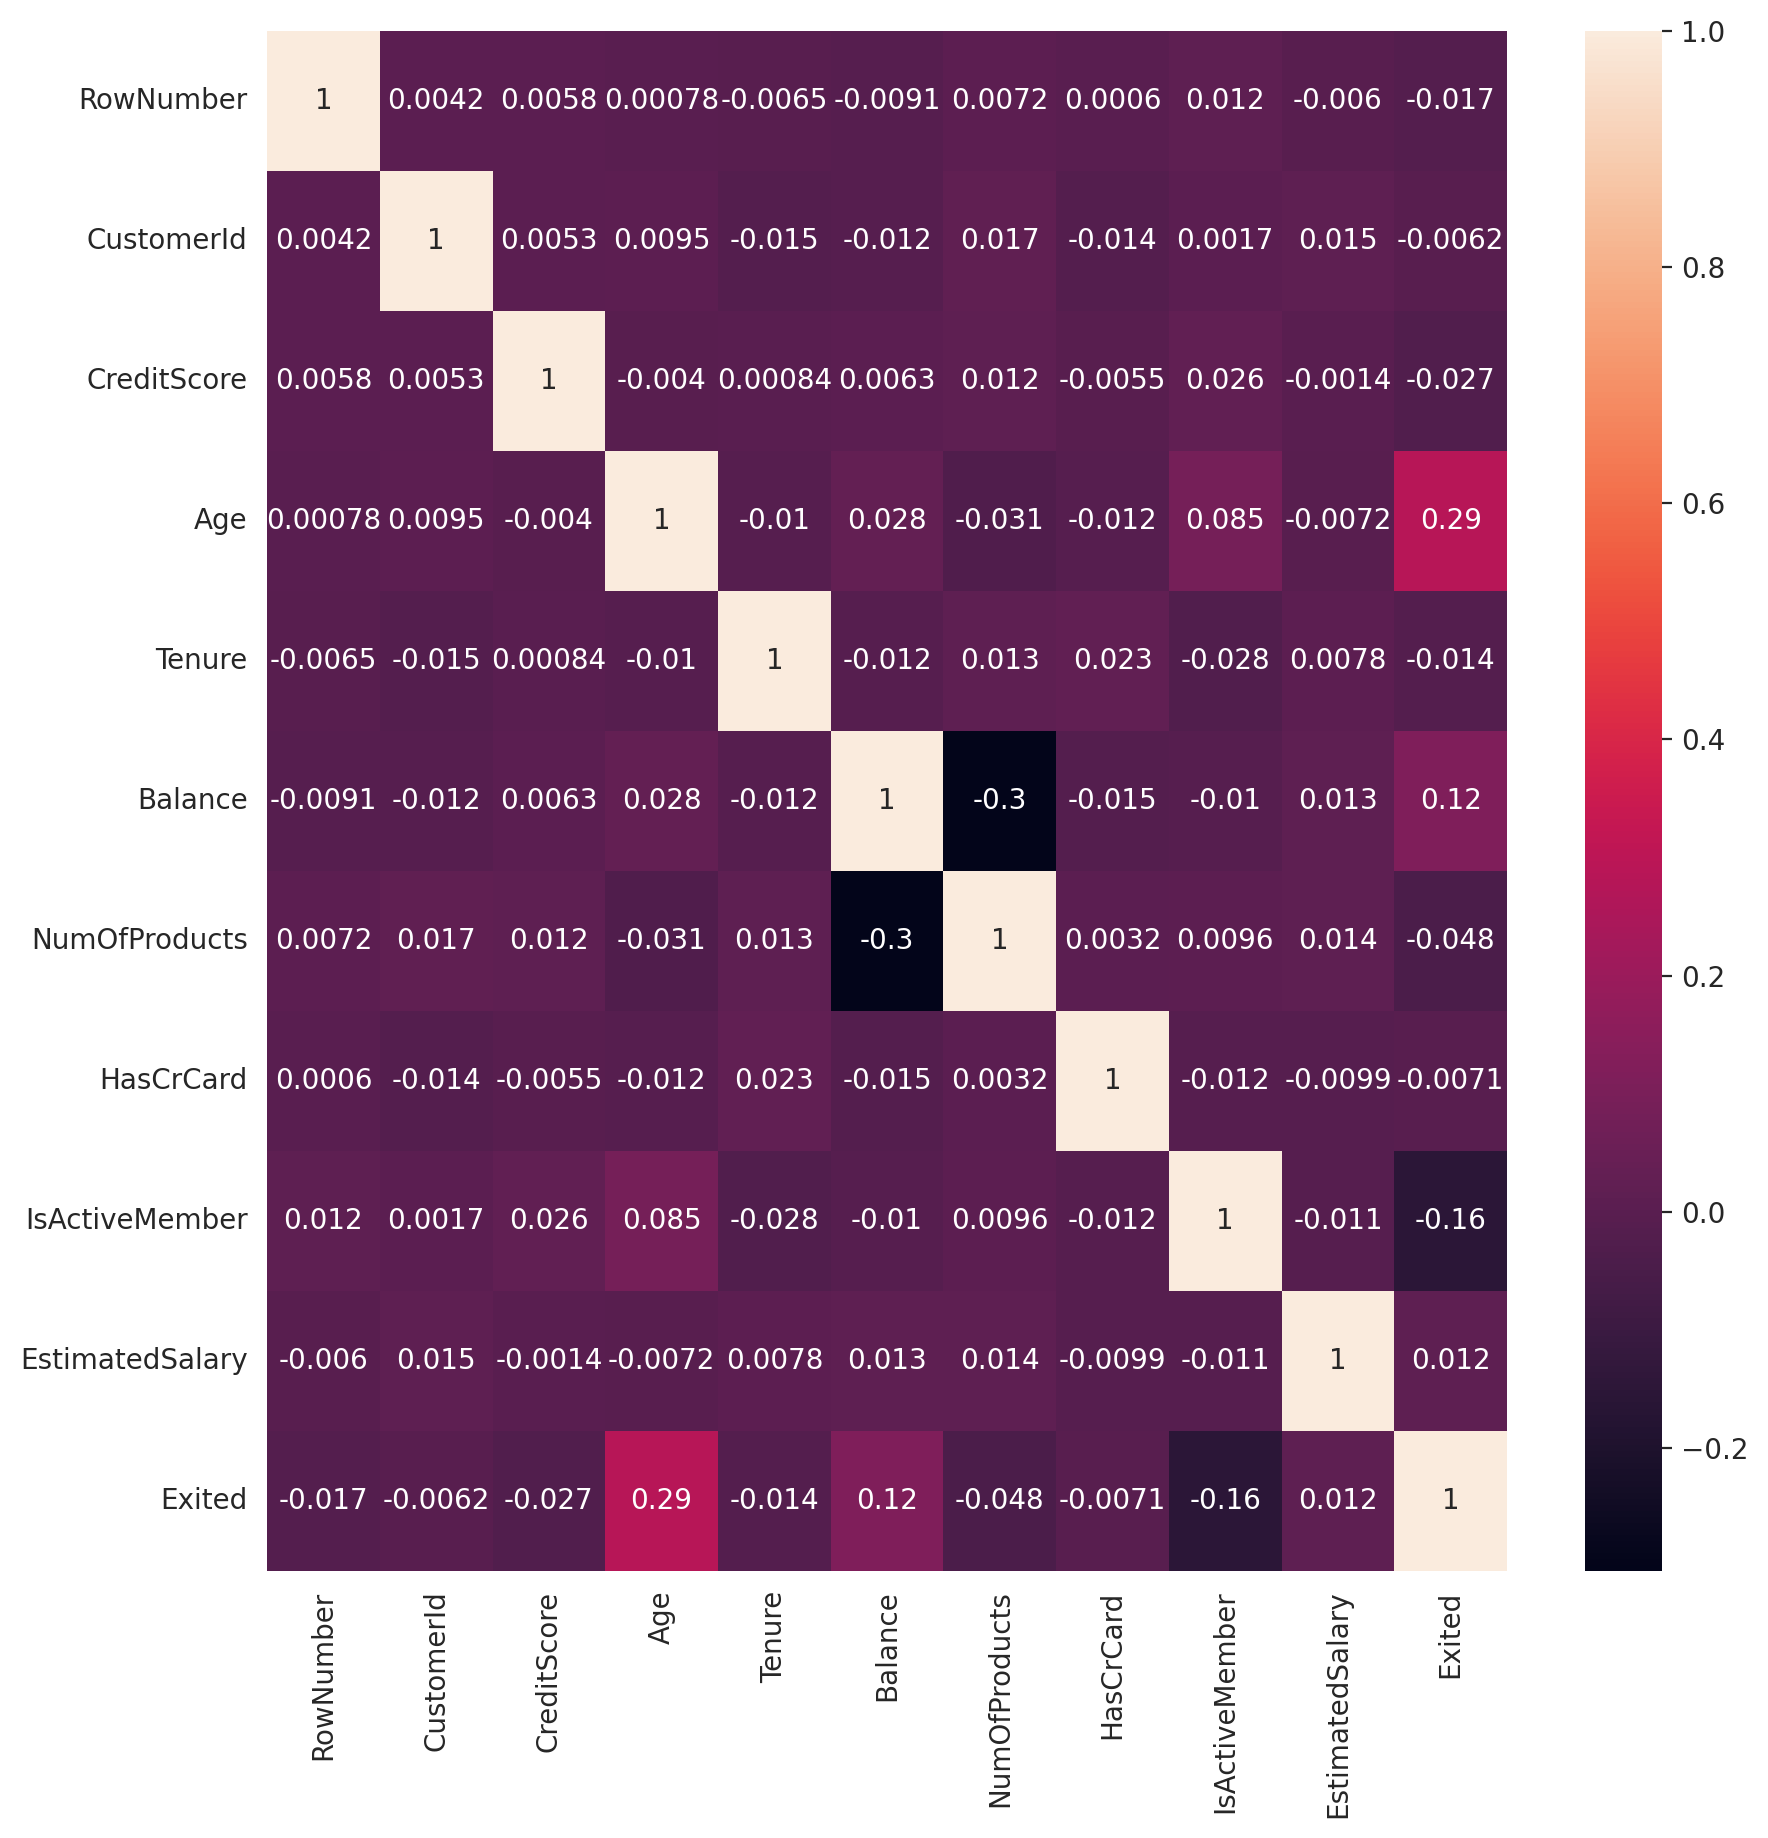

In [36]:
# There are no high corrleation
plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(df.corr(), annot=True);

Drop the features that not suitable for modelling

In [37]:
# drop unnecessary features
df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace=True)

In [38]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


Convert categorical variables to dummy variables

In [39]:
df_d = df.copy() # where d stand for dummies

# calling the get_dummies method to convert categorical to numerical
df_d = pd.get_dummies(df_d,
                     columns = ['Gender', 'Geography'])

display(df_d)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,1,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0,0,0,1
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,1,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,1,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,1,1,0,0
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,1,1,0,0
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,1,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
# Here the model wont give us different result with each run (unless we made some changes to the model)
SEED = 32
import random

os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [42]:
# df_d : the orginal data frame after the encoding
X = df_d.drop("Exited", axis=1)
y = df_d["Exited"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state=SEED)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=SEED)

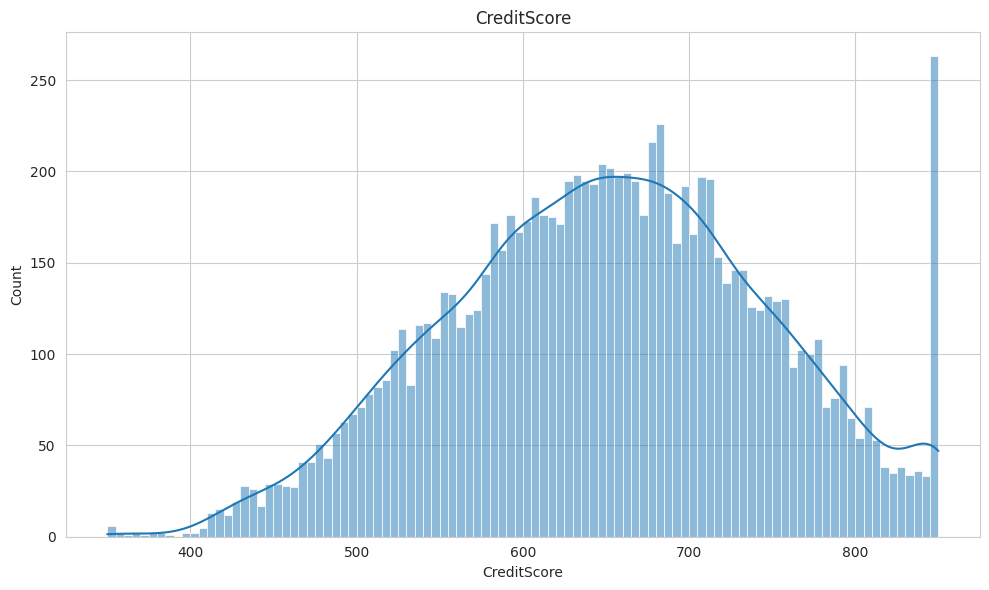

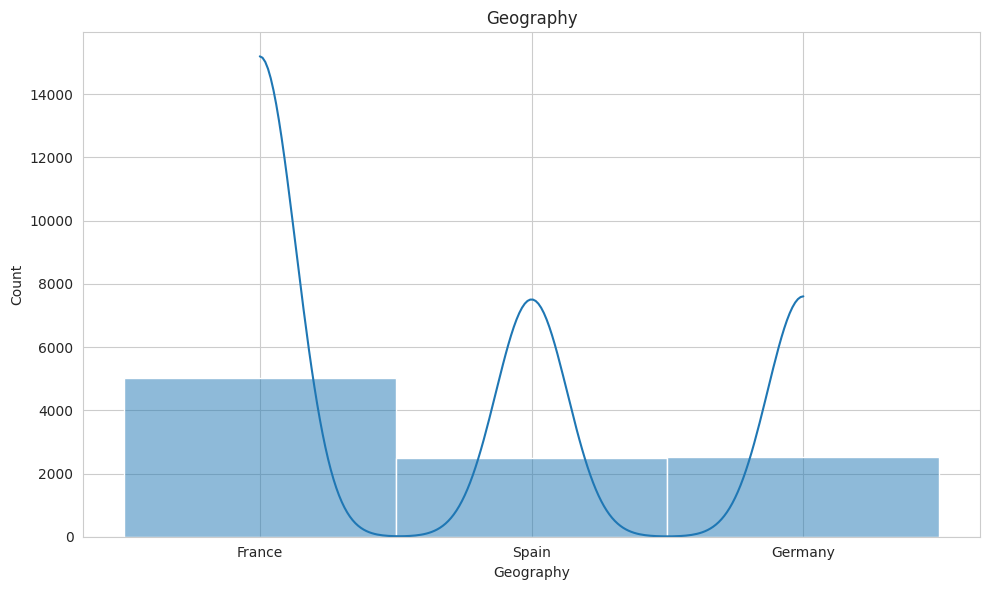

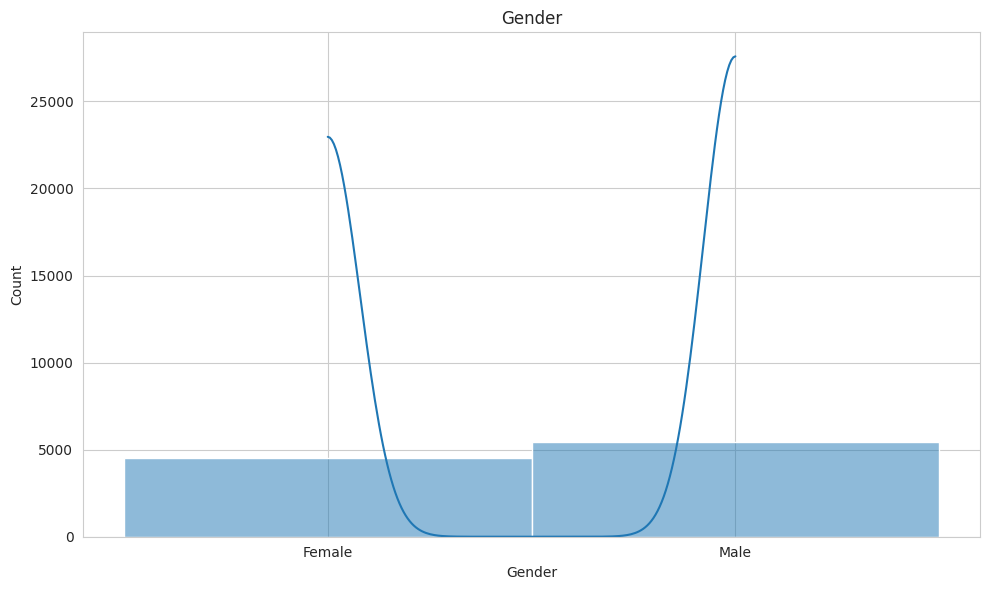

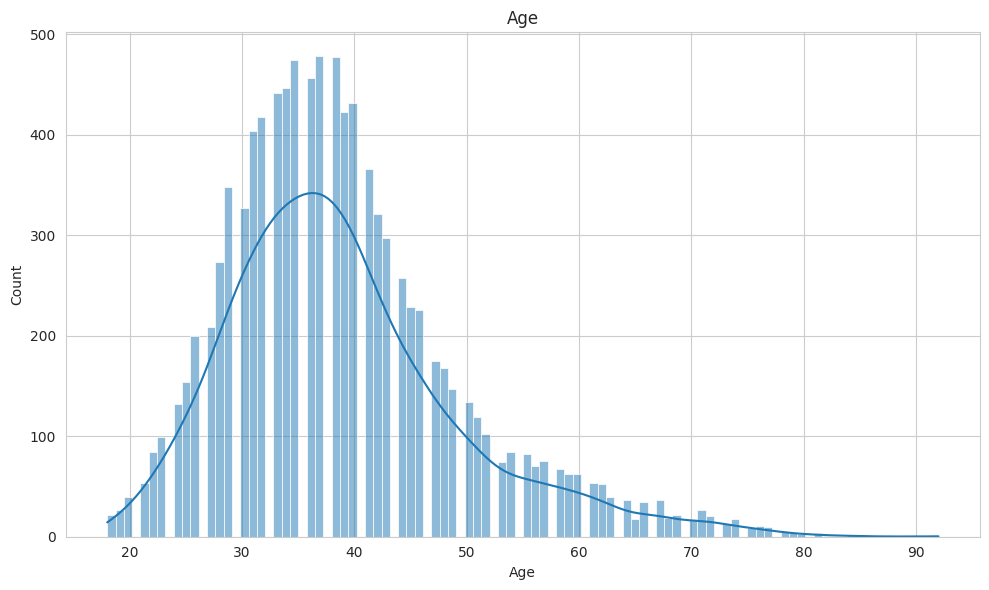

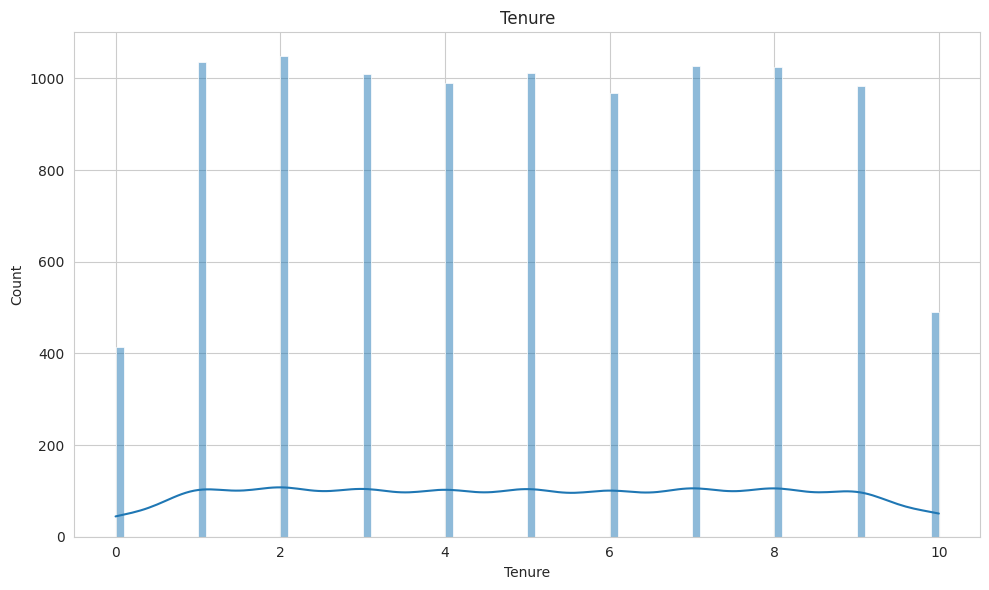

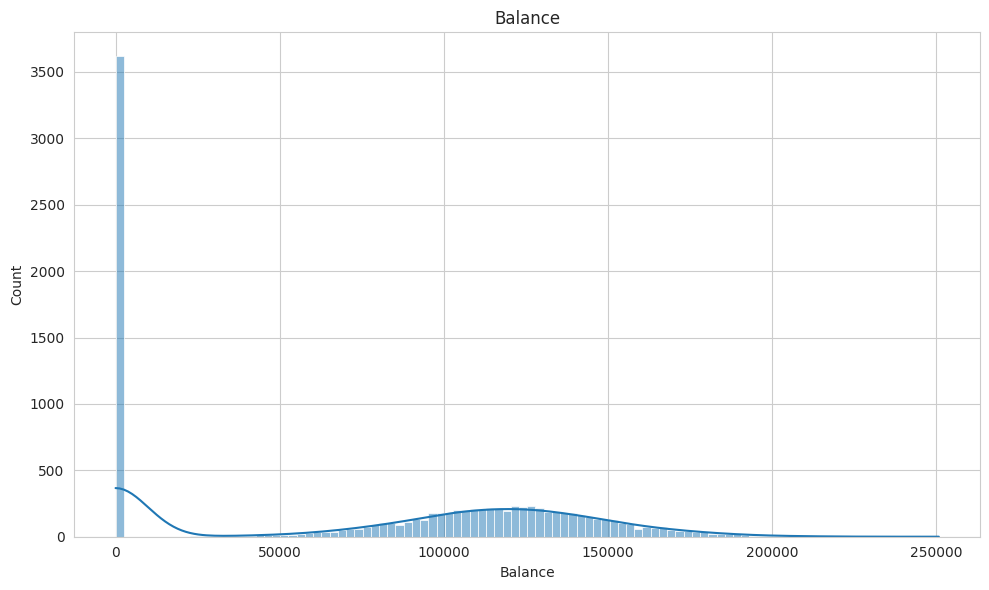

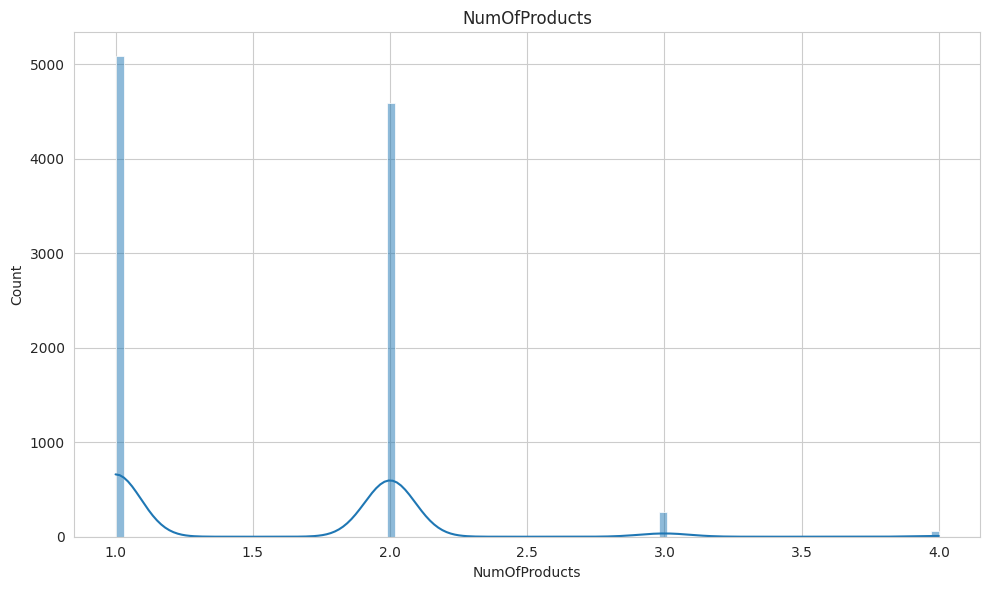

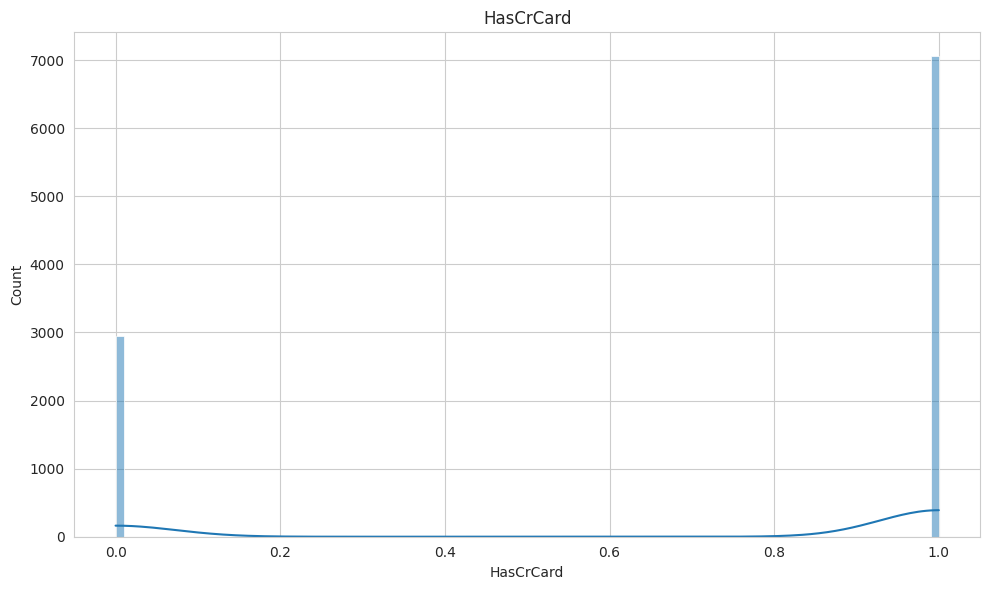

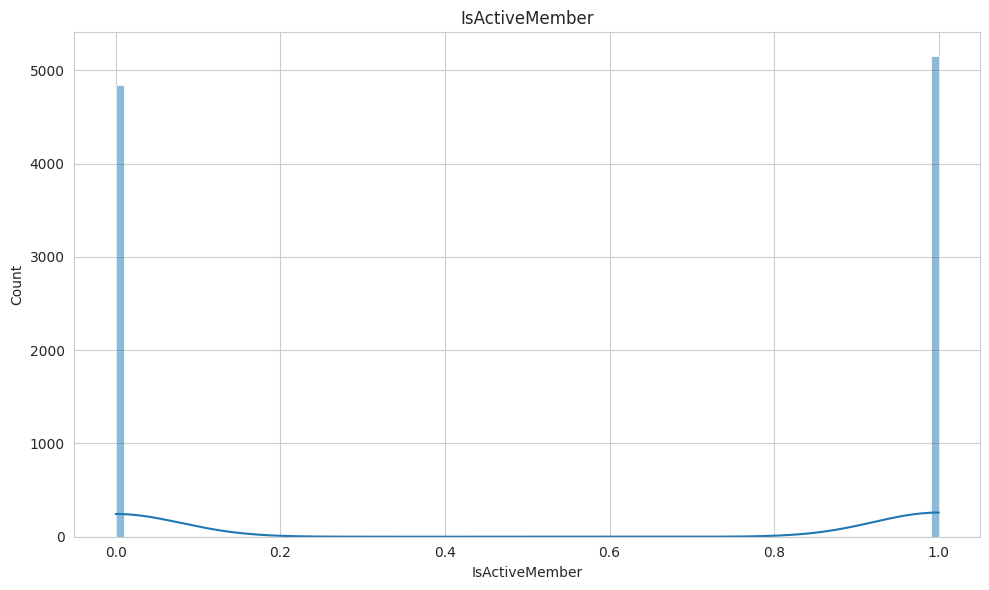

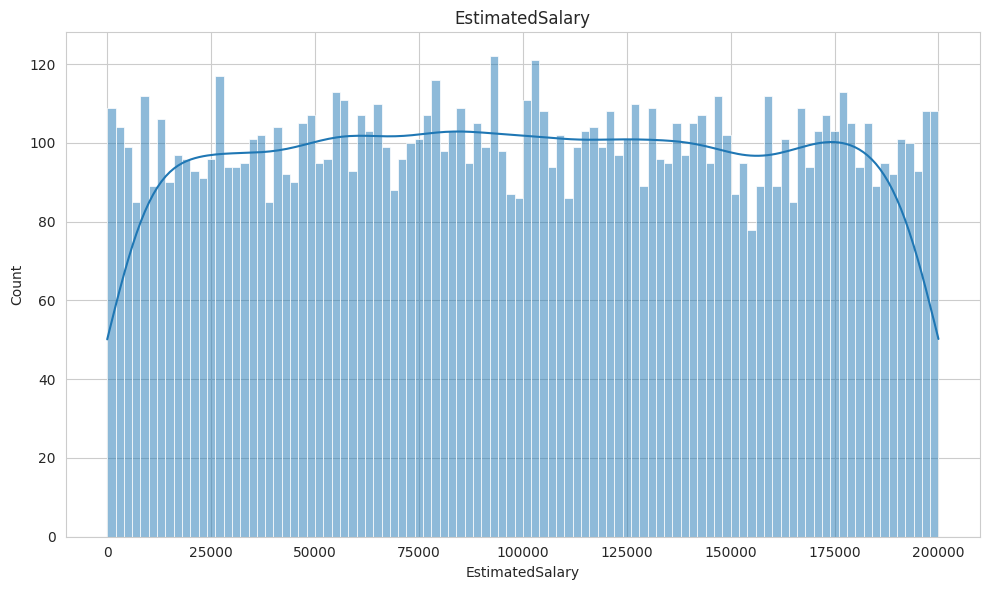

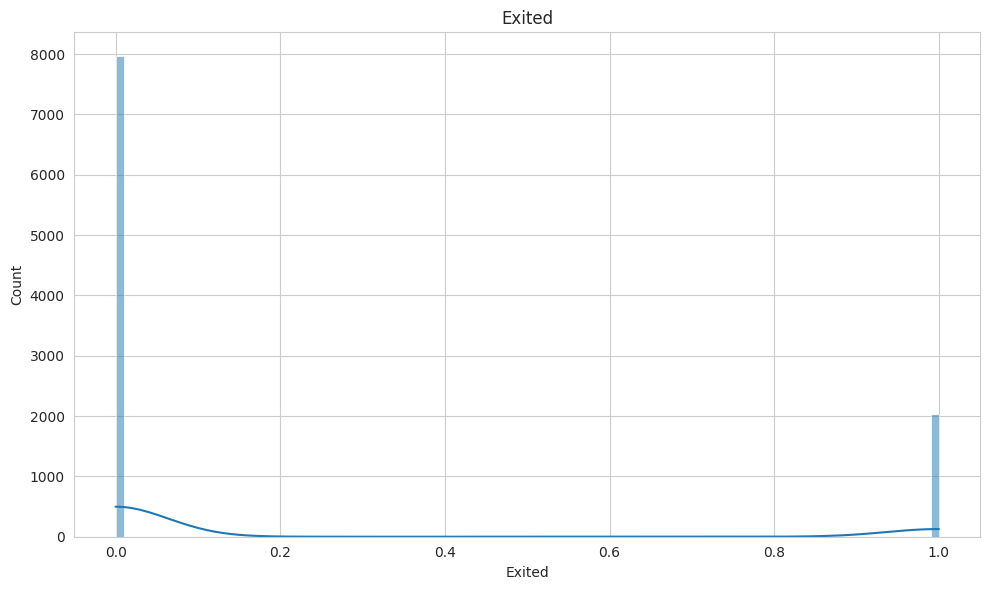

In [44]:
#show the distribution for Estimaited salary feature

for i in df.columns:

    plt.figure()
    plt.title(f'{i}')
    sns.histplot(df[i], bins=100, kde=True, )
    plt.tight_layout();

In [45]:
# We decide to use MinMax Scaler instead of Standard Scaler, since some of our features give a weird shape (as the above plots showed) that is far from the normal distribution (ex. Estimiated salary)
Scaler = MinMaxScaler()

In [46]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
x_val = Scaler.transform(x_val)

In [47]:
X_train.shape

(8100, 13)

In [48]:
X_test.shape

(1000, 13)

In [49]:
x_val.shape

(900, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [51]:


model = Sequential()
# We tried a network with 2 hidden layers where gave us a validation loss lower than the training loss which is something new to us,
# even though the 3 hidden layers gives us an overfit but we can deal with it by adding dropout layer
# The three hidden layers
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(12, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))




model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [52]:
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), batch_size=32, epochs=700, verbose=1)

Epoch 1/700
254/254 [==============================] - 8s 4ms/step - loss: 0.5839 - recall: 0.0939 - val_loss: 0.4759 - val_recall: 0.0000e+00
Epoch 2/700
254/254 [==============================] - 1s 4ms/step - loss: 0.4609 - recall: 0.0000e+00 - val_loss: 0.4536 - val_recall: 0.0000e+00
Epoch 3/700
254/254 [==============================] - 1s 4ms/step - loss: 0.4442 - recall: 0.1012 - val_loss: 0.4535 - val_recall: 0.2896
Epoch 4/700
254/254 [==============================] - 1s 4ms/step - loss: 0.4299 - recall: 0.1885 - val_loss: 0.4302 - val_recall: 0.1530
Epoch 5/700
254/254 [==============================] - 1s 4ms/step - loss: 0.4189 - recall: 0.2182 - val_loss: 0.4218 - val_recall: 0.2514
Epoch 6/700
254/254 [==============================] - 1s 4ms/step - loss: 0.4072 - recall: 0.2570 - val_loss: 0.4125 - val_recall: 0.3060
Epoch 7/700
254/254 [==============================] - 1s 4ms/step - loss: 0.3942 - recall: 0.3024 - val_loss: 0.4038 - val_recall: 0.4208
Epoch 8/700
254

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
690,0.296,0.543,0.382,0.546
691,0.296,0.545,0.379,0.486
692,0.295,0.541,0.381,0.481
693,0.295,0.545,0.381,0.514
694,0.295,0.548,0.374,0.492
695,0.294,0.541,0.372,0.475
696,0.295,0.539,0.372,0.492
697,0.296,0.554,0.381,0.546
698,0.294,0.541,0.380,0.470
699,0.294,0.538,0.394,0.486


<Figure size 900x900 with 0 Axes>

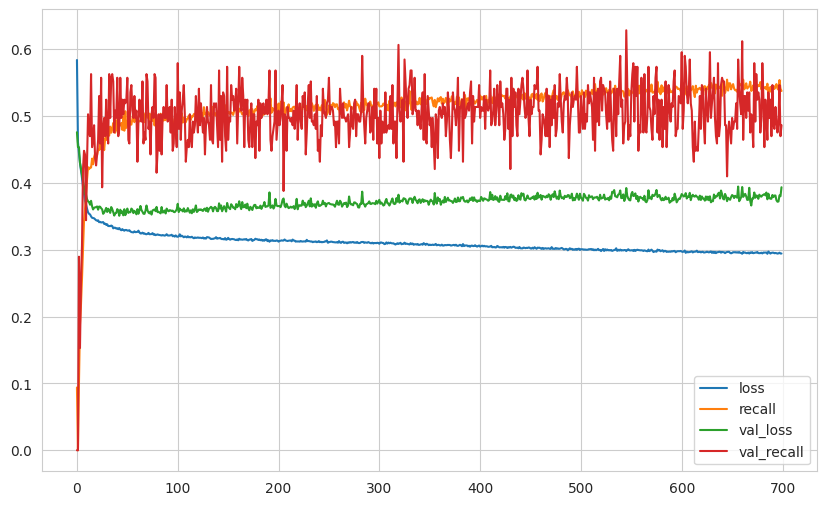

In [55]:
# Regarding the learning curve we can tell that the model overfit the training data, since the validation loss at certain point increases while training loss decreaseplt.
plt.figure(figsize=(9,9))
loss_df.plot()
plt.show()

In [56]:
model.evaluate(X_test, y_test, verbose=0)

[0.35398370027542114, 0.4950980246067047]

In [57]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.35398370027542114
Recall:  0.4950980246067047


In [58]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[758  38]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.73      0.50      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [59]:
from sklearn import metrics

32/32 [==============================] - 0s 2ms/step


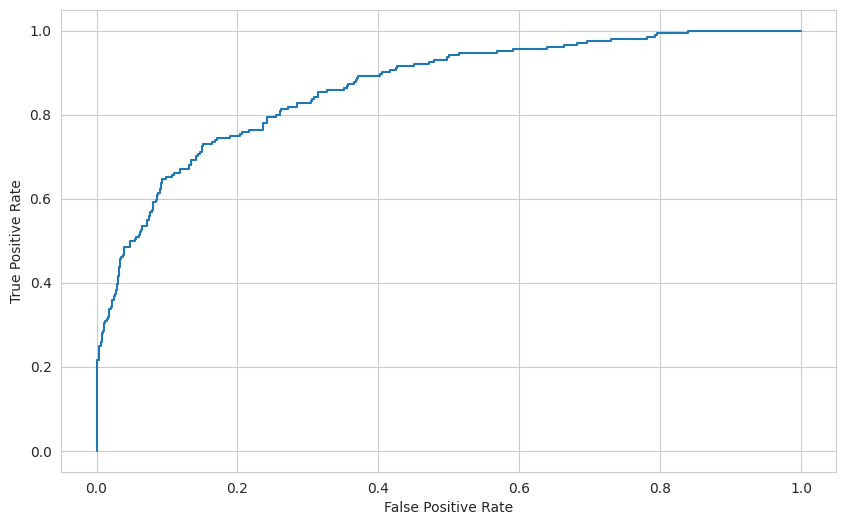

In [60]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


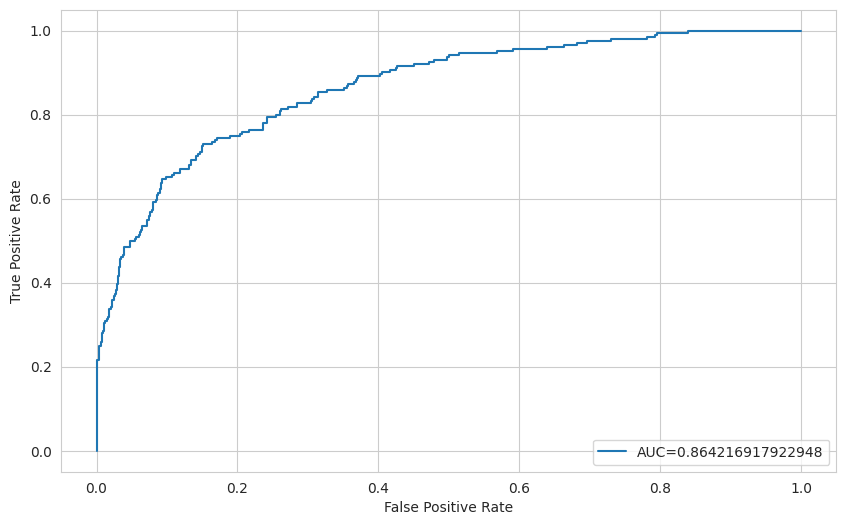

In [61]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [62]:
from sklearn.utils import class_weight

In [63]:


model = Sequential()
# Three hidden layers
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(12, activation="relu"))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))



model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [64]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train)
train_class_weights = dict(enumerate(class_weights))
train_class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [65]:
# The model after adding Class weight
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=32, epochs=700, verbose=1)

Epoch 1/700
254/254 [==============================] - 3s 5ms/step - loss: 0.6693 - recall: 0.5091 - val_loss: 0.6079 - val_recall: 0.5410
Epoch 2/700
254/254 [==============================] - 1s 4ms/step - loss: 0.6193 - recall: 0.6497 - val_loss: 0.6120 - val_recall: 0.6721
Epoch 3/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5938 - recall: 0.6915 - val_loss: 0.7374 - val_recall: 0.8251
Epoch 4/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5744 - recall: 0.7036 - val_loss: 0.5409 - val_recall: 0.6612
Epoch 5/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5607 - recall: 0.7200 - val_loss: 0.5639 - val_recall: 0.7158
Epoch 6/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5468 - recall: 0.7315 - val_loss: 0.5429 - val_recall: 0.6831
Epoch 7/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5311 - recall: 0.7285 - val_loss: 0.5762 - val_recall: 0.7486
Epoch 8/700
254/254 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                336       
                                                                 
 dense_5 (Dense)             (None, 12)                300       
                                                                 
 dense_6 (Dense)             (None, 6)                 78        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
690,0.381,0.819,0.533,0.765
691,0.381,0.824,0.485,0.732
692,0.380,0.819,0.481,0.699
693,0.382,0.816,0.511,0.754
694,0.382,0.824,0.499,0.716
695,0.379,0.824,0.451,0.694
696,0.384,0.816,0.492,0.743
697,0.380,0.820,0.527,0.710
698,0.381,0.827,0.468,0.699
699,0.380,0.828,0.438,0.656


<Figure size 900x900 with 0 Axes>

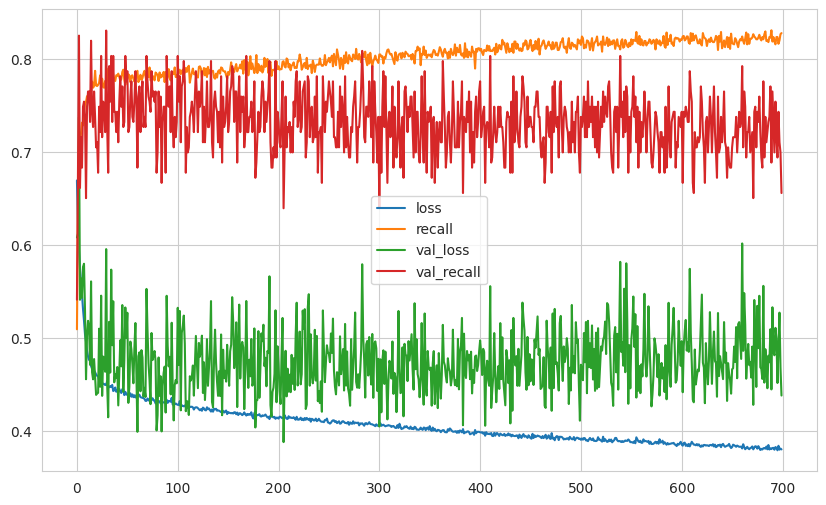

In [68]:
plt.figure(figsize=(9,9)) # still we have overvitting issue even though with class waight
loss_df.plot()
plt.show()

In [69]:
model.evaluate(X_test, y_test, verbose=0)

[0.4209524393081665, 0.6911764740943909]

In [70]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.4209524393081665
Recall:  0.6911764740943909


In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[687 109]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       796
           1       0.56      0.69      0.62       204

    accuracy                           0.83      1000
   macro avg       0.74      0.78      0.75      1000
weighted avg       0.84      0.83      0.83      1000



32/32 [==============================] - 0s 2ms/step


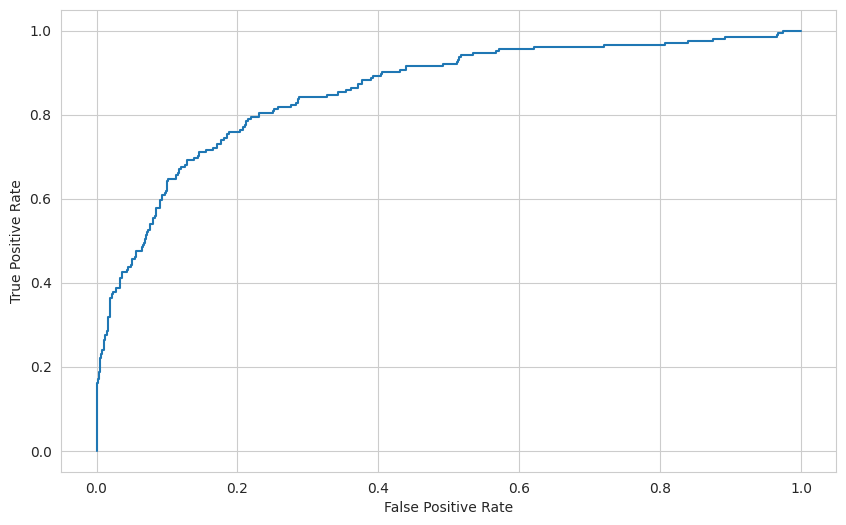

In [72]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


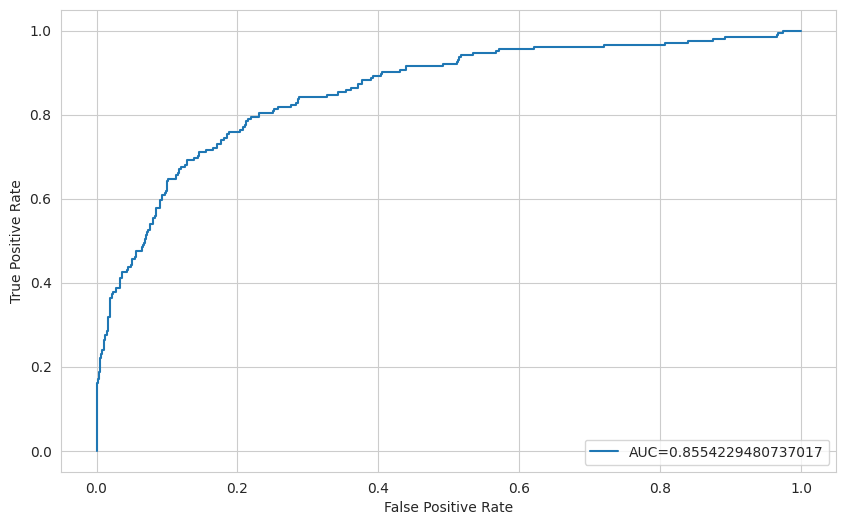

In [73]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [74]:
#So now we will increase the hyperparamter (learining rate)from default one which is 0.001 (in previoues model) with class waight model to see if it change the performnce or not

from tensorflow.keras.optimizers import Adam



model = Sequential()
# Three hidden layers
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(12, activation="relu"))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])



In [75]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train)
train_class_weights = dict(enumerate(class_weights))
train_class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [76]:
# With Class weight of "balanced" and increasing the learining rate
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=32, epochs=700, verbose=1)

Epoch 1/700
254/254 [==============================] - 2s 5ms/step - loss: 0.6222 - recall: 0.6836 - val_loss: 0.5220 - val_recall: 0.5464
Epoch 2/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5451 - recall: 0.6976 - val_loss: 0.4530 - val_recall: 0.6503
Epoch 3/700
254/254 [==============================] - 1s 5ms/step - loss: 0.5090 - recall: 0.7164 - val_loss: 0.4958 - val_recall: 0.7322
Epoch 4/700
254/254 [==============================] - 1s 6ms/step - loss: 0.4920 - recall: 0.7376 - val_loss: 0.4470 - val_recall: 0.6230
Epoch 5/700
254/254 [==============================] - 1s 6ms/step - loss: 0.4872 - recall: 0.7491 - val_loss: 0.4993 - val_recall: 0.7541
Epoch 6/700
254/254 [==============================] - 1s 4ms/step - loss: 0.4835 - recall: 0.7552 - val_loss: 0.5033 - val_recall: 0.7158
Epoch 7/700
254/254 [==============================] - 1s 4ms/step - loss: 0.4830 - recall: 0.7418 - val_loss: 0.5437 - val_recall: 0.7869
Epoch 8/700
254/254 [======

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 24)                336       
                                                                 
 dense_9 (Dense)             (None, 12)                300       
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
690,0.356,0.859,0.625,0.787
691,0.358,0.857,0.557,0.727
692,0.355,0.859,0.592,0.727
693,0.359,0.856,0.621,0.743
694,0.366,0.849,0.585,0.770
695,0.354,0.861,0.585,0.760
696,0.359,0.852,0.613,0.765
697,0.355,0.870,0.598,0.770
698,0.358,0.864,0.569,0.721
699,0.359,0.848,0.599,0.721


<Figure size 900x900 with 0 Axes>

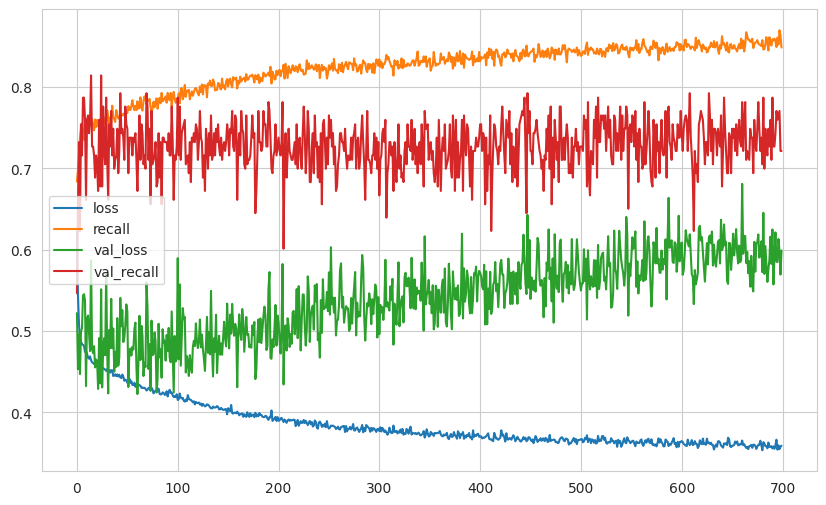

In [79]:
plt.figure(figsize=(9,9)) # still we have overvitting issue even though with class waight and increaing learining rate to 5
loss_df.plot()
plt.show()

In [80]:
model.evaluate(X_test, y_test, verbose=0)

[0.5469658970832825, 0.7009803652763367]

In [81]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5469658970832825
Recall:  0.7009803652763367


In [82]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[643 153]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.70      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.83      0.79      0.80      1000



32/32 [==============================] - 0s 2ms/step


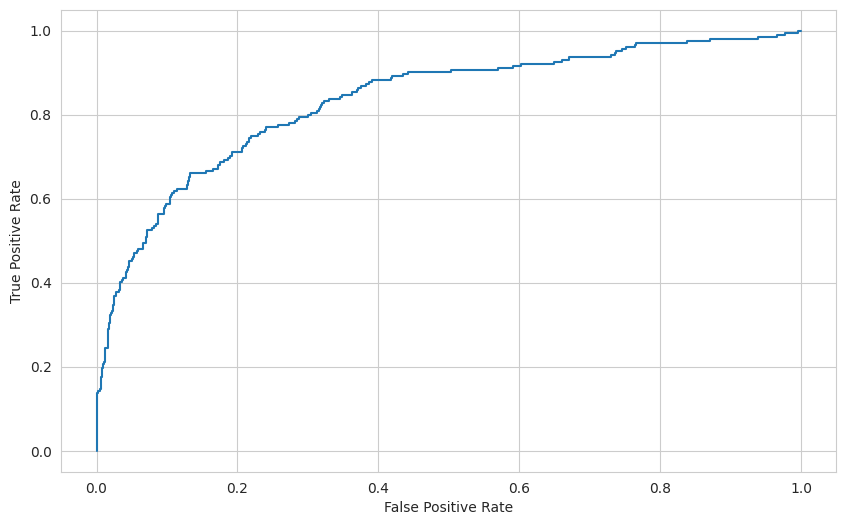

In [83]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


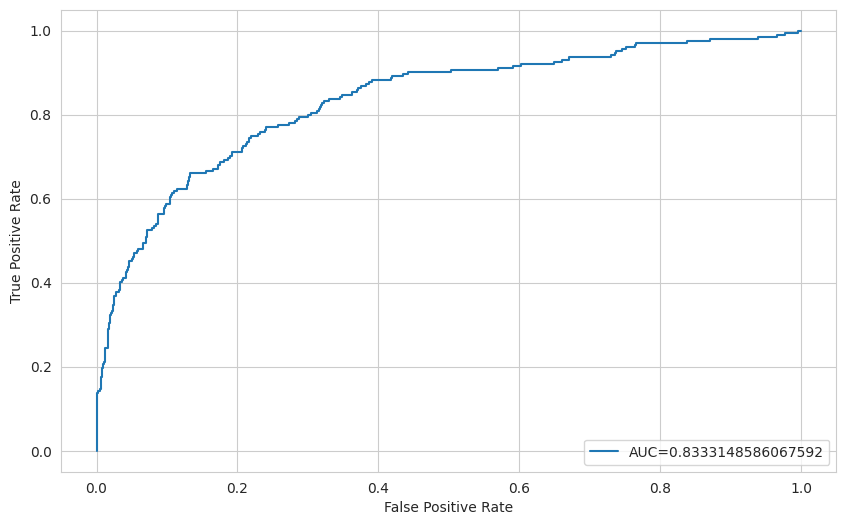

In [84]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Add Dropout Layer

In [85]:
from tensorflow.keras.layers import Dropout

In [86]:
model = Sequential()
# Three hidden layers adding dropout
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
# Dropout(0.2), it means that you are randomly making the activation of 20% of the neurons in the input to zero.
model.add(Dropout(0.2))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt = "adam"
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [87]:
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=32, epochs=700, verbose=1)

Epoch 1/700
254/254 [==============================] - 3s 5ms/step - loss: 0.6736 - recall: 0.5867 - val_loss: 0.6779 - val_recall: 0.6284
Epoch 2/700
254/254 [==============================] - 1s 4ms/step - loss: 0.6580 - recall: 0.6030 - val_loss: 0.6441 - val_recall: 0.5902
Epoch 3/700
254/254 [==============================] - 1s 5ms/step - loss: 0.6404 - recall: 0.6133 - val_loss: 0.6405 - val_recall: 0.6940
Epoch 4/700
254/254 [==============================] - 1s 6ms/step - loss: 0.6273 - recall: 0.6515 - val_loss: 0.5955 - val_recall: 0.6448
Epoch 5/700
254/254 [==============================] - 1s 6ms/step - loss: 0.6197 - recall: 0.6527 - val_loss: 0.6248 - val_recall: 0.7596
Epoch 6/700
254/254 [==============================] - 1s 4ms/step - loss: 0.6036 - recall: 0.6818 - val_loss: 0.5954 - val_recall: 0.7213
Epoch 7/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5951 - recall: 0.6733 - val_loss: 0.5735 - val_recall: 0.7158
Epoch 8/700
254/254 [======

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                336       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 12)                300       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_14 (Dense)            (None, 6)                 78        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.8

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
690,0.426,0.793,0.467,0.770
691,0.428,0.807,0.442,0.760
692,0.432,0.782,0.450,0.749
693,0.439,0.797,0.454,0.760
694,0.434,0.799,0.448,0.743
695,0.433,0.785,0.462,0.754
696,0.431,0.773,0.482,0.803
697,0.437,0.775,0.452,0.716
698,0.429,0.789,0.438,0.710
699,0.426,0.790,0.437,0.721


<Figure size 900x900 with 0 Axes>

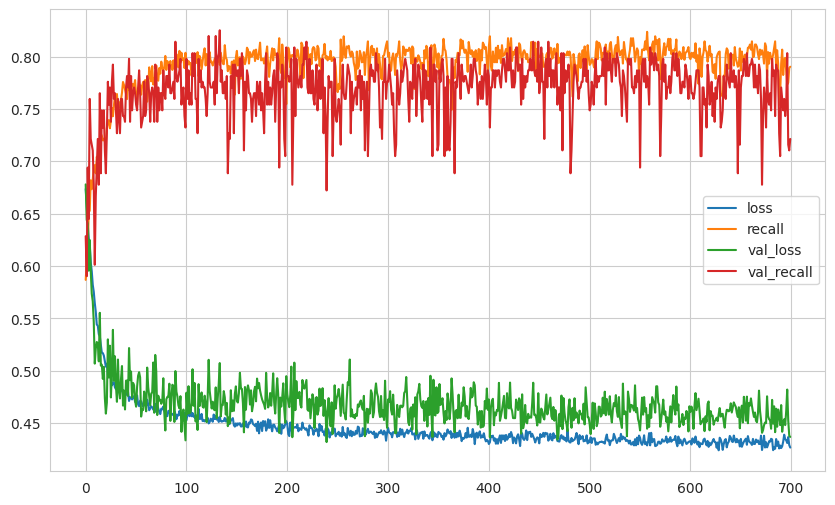

In [90]:
plt.figure(figsize=(9,9)) #the droupout layer avoid overviting issue
loss_df.plot()
plt.show()

In [91]:
model.evaluate(X_test, y_test, verbose=0)

[0.39761486649513245, 0.720588207244873]

In [92]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.39761486649513245
Recall:  0.720588207244873


In [93]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[685 111]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       796
           1       0.57      0.72      0.64       204

    accuracy                           0.83      1000
   macro avg       0.75      0.79      0.76      1000
weighted avg       0.85      0.83      0.84      1000



32/32 [==============================] - 0s 2ms/step


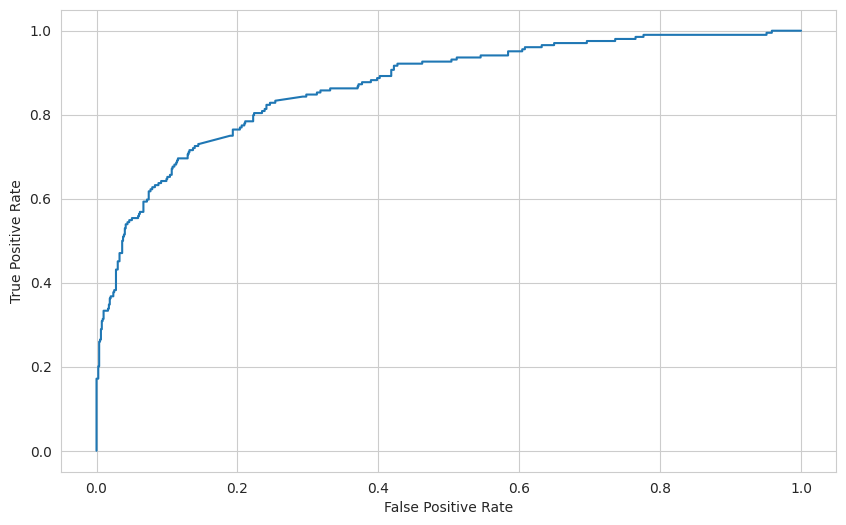

In [94]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


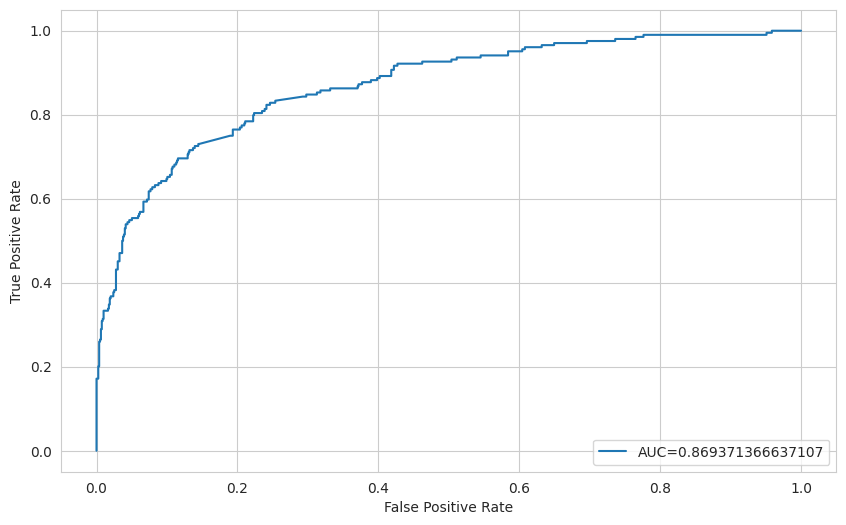

In [95]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [96]:
model = Sequential()
# Three hidden layers adding dropout
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
# Dropout(0.2), it means that you are randomly making the activation of 20% of the neurons in the input to zero.


model.add(Dense(12, activation="relu"))


model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt ="adam"
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [97]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min",verbose=1,patience=100, restore_best_weights = True)


In [98]:

model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=32, epochs=700, verbose=1, callbacks=[early_stop])


Epoch 1/700
254/254 [==============================] - 2s 5ms/step - loss: 0.6583 - recall: 0.5867 - val_loss: 0.5841 - val_recall: 0.5301
Epoch 2/700
254/254 [==============================] - 1s 4ms/step - loss: 0.6059 - recall: 0.6521 - val_loss: 0.5738 - val_recall: 0.6503
Epoch 3/700
254/254 [==============================] - 1s 5ms/step - loss: 0.5831 - recall: 0.6952 - val_loss: 0.7335 - val_recall: 0.8361
Epoch 4/700
254/254 [==============================] - 1s 6ms/step - loss: 0.5669 - recall: 0.7091 - val_loss: 0.5736 - val_recall: 0.6885
Epoch 5/700
254/254 [==============================] - 1s 5ms/step - loss: 0.5530 - recall: 0.7212 - val_loss: 0.5715 - val_recall: 0.7268
Epoch 6/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5367 - recall: 0.7455 - val_loss: 0.5511 - val_recall: 0.7322
Epoch 7/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5225 - recall: 0.7509 - val_loss: 0.5609 - val_recall: 0.7541
Epoch 8/700
254/254 [======

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
170,0.420,0.783,0.462,0.732
171,0.421,0.779,0.469,0.749
172,0.421,0.789,0.494,0.749
173,0.421,0.782,0.513,0.754
174,0.418,0.784,0.473,0.721
175,0.419,0.782,0.477,0.732
176,0.421,0.784,0.486,0.743
177,0.423,0.783,0.425,0.699
178,0.421,0.782,0.439,0.705
179,0.420,0.785,0.465,0.743


<Figure size 900x900 with 0 Axes>

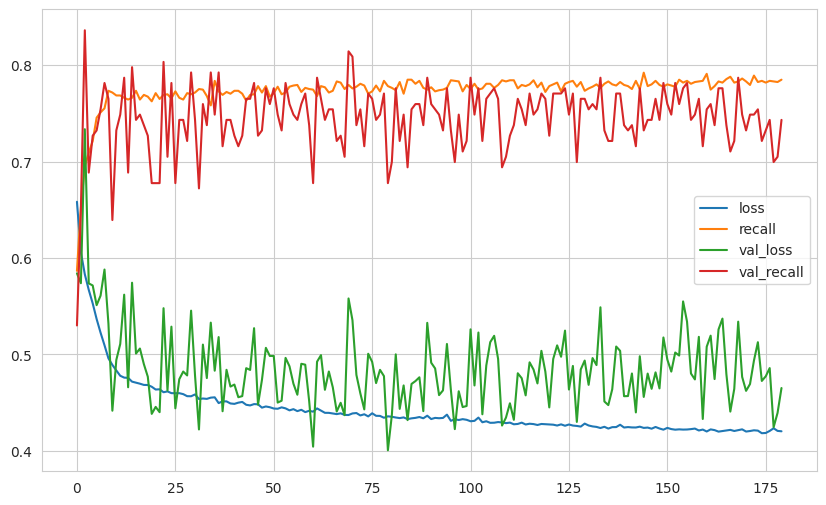

In [100]:
plt.figure(figsize=(9,9)) #this pic indicats that loss function for validation is slitly hight (38) but decresed from the previoues performance(39)
loss_df.plot()
plt.show()

In [101]:
model.evaluate(X_test, y_test, verbose=0)

[0.3868214786052704, 0.6519607901573181]

In [102]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.3868214786052704
Recall:  0.6519607901573181


In [103]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[705  91]
 [ 71 133]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       796
           1       0.59      0.65      0.62       204

    accuracy                           0.84      1000
   macro avg       0.75      0.77      0.76      1000
weighted avg       0.84      0.84      0.84      1000



32/32 [==============================] - 0s 2ms/step


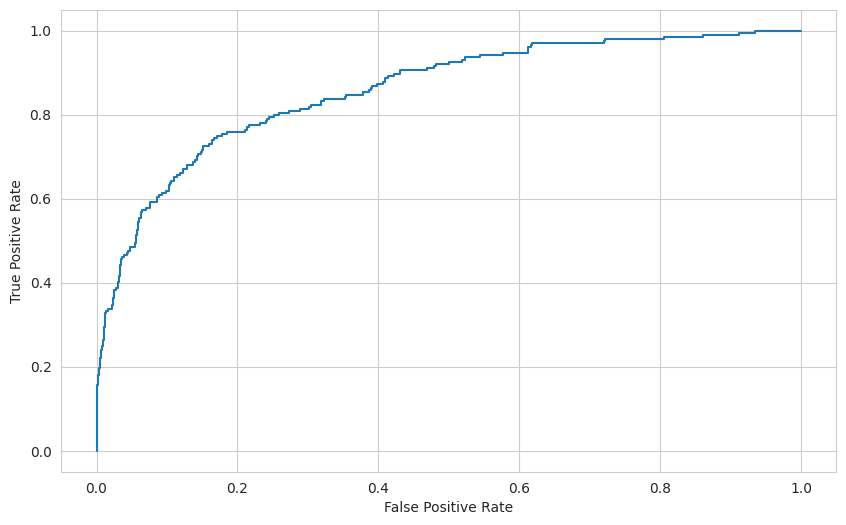

In [104]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


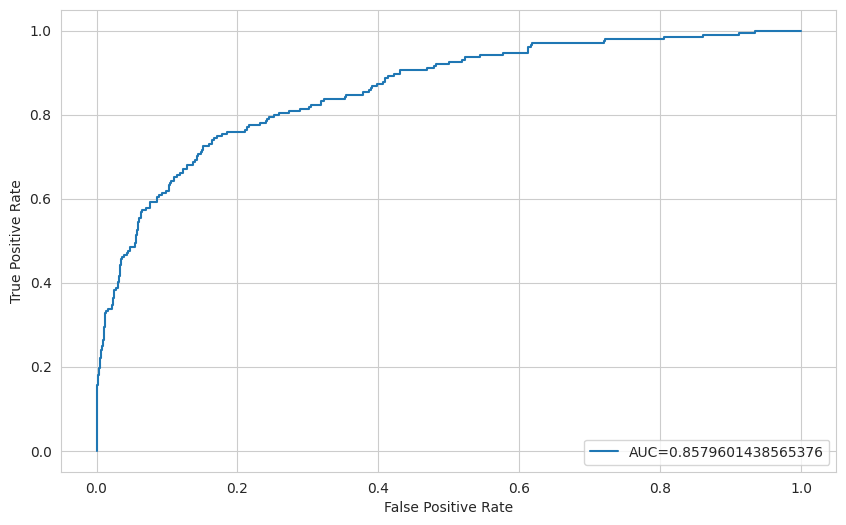

In [105]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Monitor the "val_recall" as metric

In [106]:
model = Sequential()
# Three hidden layers adding dropout
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
# Dropout(0.2), it means that you are randomly making the activation of 20% of the neurons in the input to zero.


model.add(Dense(12, activation="relu"))


model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt = "adam"
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [107]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=100, restore_best_weights=True
)

In [108]:
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=32, epochs=700, verbose=1, callbacks=[early_stop],)


Epoch 1/700
254/254 [==============================] - 2s 5ms/step - loss: 0.6767 - recall: 0.5182 - val_loss: 0.6443 - val_recall: 0.6448
Epoch 2/700
254/254 [==============================] - 1s 5ms/step - loss: 0.6275 - recall: 0.6388 - val_loss: 0.6292 - val_recall: 0.6995
Epoch 3/700
254/254 [==============================] - 1s 6ms/step - loss: 0.6013 - recall: 0.6758 - val_loss: 0.7322 - val_recall: 0.8142
Epoch 4/700
254/254 [==============================] - 1s 5ms/step - loss: 0.5811 - recall: 0.7000 - val_loss: 0.5539 - val_recall: 0.6284
Epoch 5/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5659 - recall: 0.7158 - val_loss: 0.5628 - val_recall: 0.6885
Epoch 6/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5486 - recall: 0.7333 - val_loss: 0.5504 - val_recall: 0.6667
Epoch 7/700
254/254 [==============================] - 1s 4ms/step - loss: 0.5306 - recall: 0.7382 - val_loss: 0.5782 - val_recall: 0.7322
Epoch 8/700
254/254 [======

<Axes: >

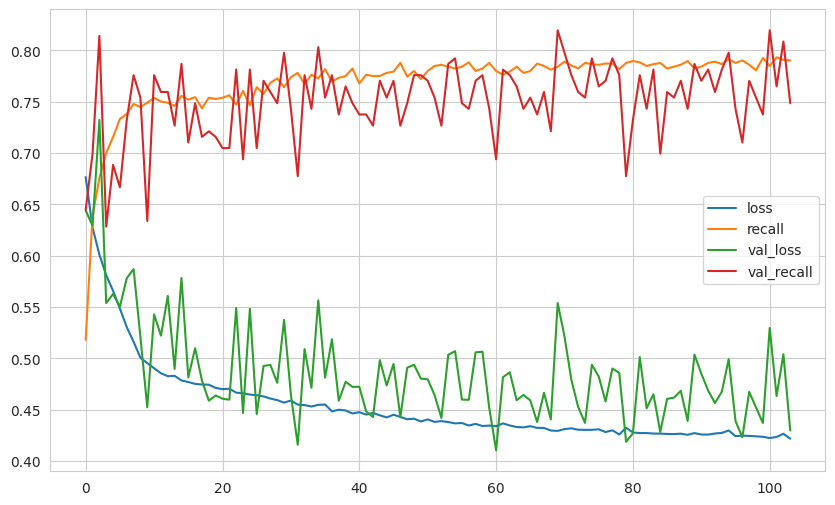

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [110]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5601598024368286
Recall:  0.5833333134651184


In [111]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[593 203]
 [ 85 119]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       796
           1       0.37      0.58      0.45       204

    accuracy                           0.71      1000
   macro avg       0.62      0.66      0.63      1000
weighted avg       0.77      0.71      0.73      1000



## Optuna


In [112]:
!pip3 install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [113]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [114]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=100, restore_best_weights=True
)

In [115]:
trial_metric = "Recall"
batch_size = 32


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 6, 128)
    n_units2 = trial.suggest_int("n_units2", 6, 128)
    n_units3 = trial.suggest_int("n_units3", 6, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(x_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [116]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 13:55:46,435] A new study created in memory with name: no-name-c33bf50f-ef16-47af-83df-eb11e5a7f139


Restoring model weights from the end of the best epoch: 22.
Epoch 122: early stopping


[I 2023-10-30 13:58:09,648] Trial 0 finished with value: 0.9019607901573181 and parameters: {'n_units1': 22, 'n_units2': 117, 'n_units3': 11, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0058113521387408934, 'w0': 0.017094037095702546, 'w1': 0.17805200770591004}. Best is trial 0 with value: 0.9019607901573181.


Restoring model weights from the end of the best epoch: 91.
Epoch 191: early stopping


[I 2023-10-30 14:01:42,591] Trial 1 finished with value: 0.47549018263816833 and parameters: {'n_units1': 35, 'n_units2': 58, 'n_units3': 51, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0012058326814016296, 'w0': 1.391369894092978, 'w1': 1.2444159718218541}. Best is trial 0 with value: 0.9019607901573181.


Restoring model weights from the end of the best epoch: 221.
Epoch 321: early stopping


[I 2023-10-30 14:07:05,523] Trial 2 finished with value: 0.9264705777168274 and parameters: {'n_units1': 26, 'n_units2': 108, 'n_units3': 108, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00019655542418500513, 'w0': 0.029546095435967895, 'w1': 0.6505705648543846}. Best is trial 2 with value: 0.9264705777168274.


Restoring model weights from the end of the best epoch: 11.
Epoch 111: early stopping


[I 2023-10-30 14:09:28,570] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 124, 'n_units2': 113, 'n_units3': 6, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.008052221392391777, 'w0': 0.0979502092585769, 'w1': 0.02011182008694239}. Best is trial 2 with value: 0.9264705777168274.


Restoring model weights from the end of the best epoch: 47.
Epoch 147: early stopping


[I 2023-10-30 14:12:14,921] Trial 4 finished with value: 0.4803921580314636 and parameters: {'n_units1': 119, 'n_units2': 26, 'n_units3': 90, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0008021220052430155, 'w0': 1.6110945030969743, 'w1': 1.1991452489567398}. Best is trial 2 with value: 0.9264705777168274.


Restoring model weights from the end of the best epoch: 19.
Epoch 119: early stopping


[I 2023-10-30 14:14:12,861] Trial 5 finished with value: 0.4215686321258545 and parameters: {'n_units1': 36, 'n_units2': 116, 'n_units3': 107, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002743030377180647, 'w0': 1.4394396432906902, 'w1': 0.49710489568947613}. Best is trial 2 with value: 0.9264705777168274.


Restoring model weights from the end of the best epoch: 1.
Epoch 101: early stopping


[I 2023-10-30 14:16:36,092] Trial 6 finished with value: 1.0 and parameters: {'n_units1': 118, 'n_units2': 105, 'n_units3': 28, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 4.5125419205312464e-05, 'w0': 0.020450022554502723, 'w1': 1.858156766418482}. Best is trial 6 with value: 1.0.
[I 2023-10-30 14:27:58,596] Trial 7 finished with value: 0.5882353186607361 and parameters: {'n_units1': 33, 'n_units2': 47, 'n_units3': 102, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 3.0251625711592886e-05, 'w0': 0.015389234850072216, 'w1': 0.032041219461947795}. Best is trial 6 with value: 1.0.


Restoring model weights from the end of the best epoch: 54.
Epoch 154: early stopping


[I 2023-10-30 14:30:51,303] Trial 8 finished with value: 0.9215686321258545 and parameters: {'n_units1': 36, 'n_units2': 69, 'n_units3': 62, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.011409572883909726, 'w0': 0.031116977265199488, 'w1': 0.38073869193298887}. Best is trial 6 with value: 1.0.


Restoring model weights from the end of the best epoch: 3.
Epoch 103: early stopping


[I 2023-10-30 14:33:14,629] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 71, 'n_units2': 12, 'n_units3': 119, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.906479842056499e-05, 'w0': 2.665561517849365, 'w1': 0.1845146238931293}. Best is trial 6 with value: 1.0.


{'n_units1': 118,
 'n_units2': 105,
 'n_units3': 28,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 4.5125419205312464e-05,
 'w0': 0.020450022554502723,
 'w1': 1.858156766418482}

In [117]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(unit2, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=700,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/700
254/254 [==============================] - 3s 6ms/step - loss: 0.5982 - recall: 0.0485 - val_loss: 0.5248 - val_recall: 0.0000e+00
Epoch 2/700
254/254 [==============================] - 1s 5ms/step - loss: 0.5025 - recall: 0.0000e+00 - val_loss: 0.4904 - val_recall: 0.0000e+00
Epoch 3/700
254/254 [==============================] - 1s 5ms/step - loss: 0.4858 - recall: 0.0000e+00 - val_loss: 0.4831 - val_recall: 0.0000e+00
Epoch 4/700
254/254 [==============================] - 2s 7ms/step - loss: 0.4797 - recall: 0.0000e+00 - val_loss: 0.4781 - val_recall: 0.0000e+00
Epoch 5/700
254/254 [==============================] - 2s 7ms/step - loss: 0.4761 - recall: 0.0000e+00 - val_loss: 0.4753 - val_recall: 0.0000e+00
Epoch 6/700
254/254 [==============================] - 2s 6ms/step - loss: 0.4725 - recall: 0.0036 - val_loss: 0.4726 - val_recall: 0.0000e+00
Epoch 7/700
254/254 [==============================] - 1s 5ms/step - loss: 0.4694 - recall: 0.0079 - val_loss: 0.4702 - val_re

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [118]:
history = model.history.history

In [119]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[763  33]
 [100 104]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.51      0.61       204

    accuracy                           0.87      1000
   macro avg       0.82      0.73      0.76      1000
weighted avg       0.86      0.87      0.86      1000



32/32 [==============================] - 0s 2ms/step


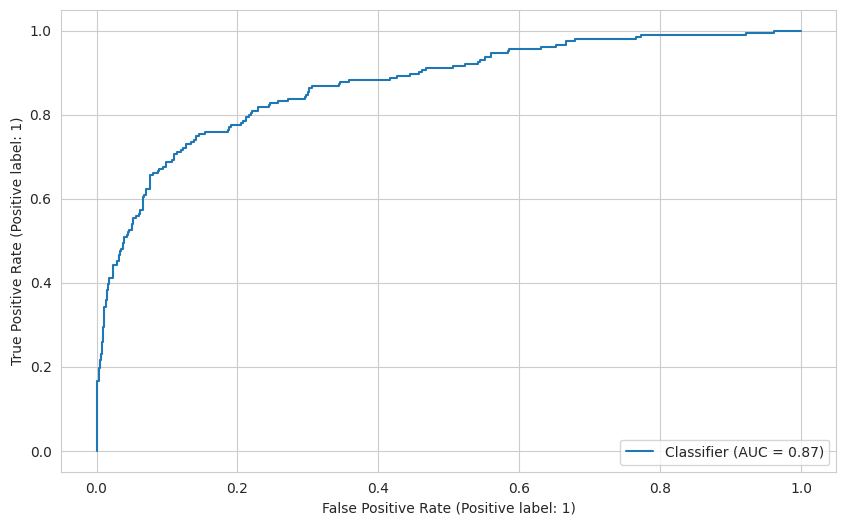

In [120]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [121]:
roc_auc_score(y_test, y_pred_proba)

0.871471327224357

# Final Model and Model Deployment

Loading Model and Scaler

In [122]:
scaler = MinMaxScaler()

In [123]:
import pickle

pickle.dump(scaler, open("/content/drive/MyDrive/scaler_bank", "wb"))

<Axes: >

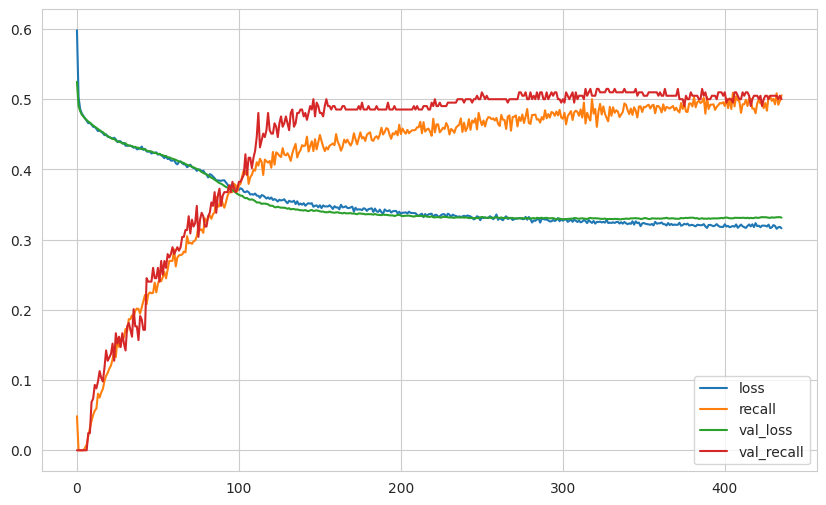

In [124]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [125]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.32884350419044495
recall:  0.5098039507865906


In [126]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[763  33]
 [100 104]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.51      0.61       204

    accuracy                           0.87      1000
   macro avg       0.82      0.73      0.76      1000
weighted avg       0.86      0.87      0.86      1000



In [127]:
from tensorflow.keras.models import load_model

In [128]:
model.save("/content/drive/MyDrive/model_bank.h5")

In [129]:
#model_cancer = load_model("/content/drive/MyDrive/model_bank.h5")
#scaler_cancer = pickle.load(open("/content/drive/MyDrive/scaler_bank", "rb"))
model_bank = load_model("/content/drive/MyDrive/model_bank.h5")
scaler_bank = pickle.load(open("/content/drive/MyDrive/scaler_bank", "rb"))

## Prediction

In [130]:
single_customer = df_d.drop("Exited", axis=1).iloc[0:1, :]
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,0,1,0,0


In [132]:

single_customer = scaler_bank.fit_transform(single_customer)
single_customer

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [133]:
(model_bank.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 62ms/step


array([[0]], dtype=int32)

In [134]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___